## 1-KNN算法

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### 生成训练数据

In [3]:
# 固定随机数生成器的种子值，以便第二次运行得到随机数相同
np.random.seed(42)
def generate_data(num_samples, num_features):
    # 生成测试数据
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size=data_size)
    # 生成标签
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    # opencv对数据要求严格，必须转换为float.32
    return data.astype(np.float32), labels


In [8]:
train_data, labels = generate_data(11,2)
train_data, labels

(array([[59., 70.],
        [43.,  7.],
        [46., 34.],
        [77., 80.],
        [35., 49.],
        [ 3.,  1.],
        [ 5., 53.],
        [ 3., 53.],
        [92., 62.],
        [17., 89.],
        [43., 33.]], dtype=float32),
 array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1]]))

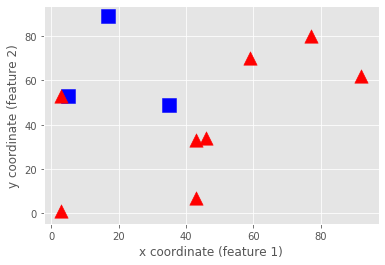

In [18]:
def plot_data(all_blue, all_red):
    # 绘制图像函数
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

### 训练分类器

In [19]:
# 加载分类器
knn = cv2.ml.KNearest_create()
# 开始训练
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

### 预测新数据点的类别

[[1.]] [[1.]] [[261.]]


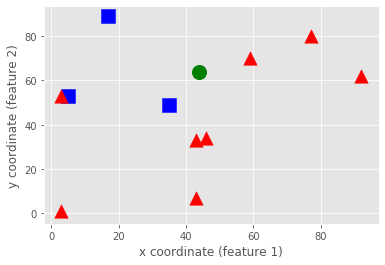

In [26]:
# 生成一个新数据点
newcomer, _ = generate_data(1,2)
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14);  # plt加上分号抑制输出

# 进行预测  (1-NN)
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print(results, neighbor, dist)

* 得到数据表明：最近的点距离261个单位远，类别为1，结果也为1

## 2-逻辑回归（分类）
* 把输入的值转换为值区间在0-1之间的一个预测值，然后向最近的整数取整

In [27]:
import numpy as np
import cv2
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt
%matplotlib inline

### 载入数据集

In [29]:
iris = datasets.load_iris()
# 查看类别标签,此方法可以遍历
print(np.unique(iris.target))

[0 1 2]


* 一共有3个类别

### 简化为二分类问题

In [31]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

Text(0, 0.5, 'sepal width (cm)')

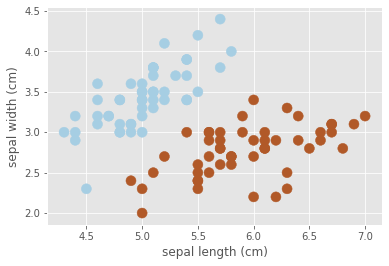

In [33]:
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### 数据分为90%的训练集，10%的测试集

In [35]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

### 训练分类器

In [37]:
# 创建一个逻辑回归分类器
lr = cv2.ml.LogisticRegression_create()

# 指定训练方法
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

# 指定算法结束前的迭代次数
lr.setIterations(100)

# 开始训练
lr.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

### 测试分类器

In [39]:
ret, y_pred = lr.predict(x_train)
print('train:',metrics.accuracy_score(y_train, y_pred))

ret, y_pred = lr.predict(x_test)
print('test:', metrics.accuracy_score(y_test, y_pred))

train: 1.0
test: 1.0
